In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng(7)

In [3]:
num_agents = 50
T = 10
num_topics = 10
R = 0.3 # confidence bound

In [4]:
def get_A(opinions, R, num_agents):
    '''
    A function to return the average opinion within R of each opinion in a vector of opinions
    '''
    
    # Create a square matrix consisting of the opinions vector repeated num_of_agents times
    opinions_repeated = np.array([opinions]*len(opinions))
    # Create matrix of boolean values indicating which opinions are within R of each opinion
    mask = abs(opinions_repeated - opinions_repeated.T) < R
    
    # Initialise averages matrix
    A = np.zeros(num_agents)

    for i in range(num_agents):
        # Get average of opinions within R of opinion
        A[i] = np.mean(opinions[mask[i,:]])
        # print(A[i])
    
    return(A)

In [5]:
X  = np.random.rand(num_agents * T * num_topics).reshape((T, num_topics, num_agents))
avg_opinion = np.zeros((num_topics,T))

In [6]:
for t in range(T-1):
    for topic in range(num_topics):
        avg = get_A(X[t,topic,:],R,num_agents)
        avg_opinion[topic,t] = np.mean(avg)
        X[t+1,topic,:] = avg

# Note: X[:,0,:].T[0] evolution of 1 agent in opinion on topic 0

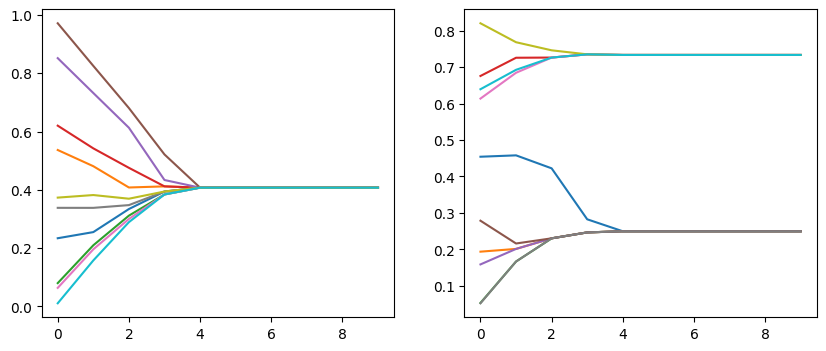

In [10]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
# for i in range(num_topics):
#     ax.plot(np.arange(T-1), avg_opinion[i,:-1])

for i in range(T):
    ax[0].plot(np.arange(T), X[:,0,:].T[i])
    ax[1].plot(np.arange(T), X[:,1,:].T[i])

In [8]:
opinions_1.sort()

# Initialising matrix of opinions over time
opinions_over_time = np.zeros((Timesteps, num_of_agents))
opinions_over_time[0,:] = opinions_1
for t in range(Timesteps-1):
    opinions_over_time[t+1,:] = get_A(opinions_over_time[t,:],R)

opinions_over_time

extremes_high = (opinions_over_time > 0.8)
extremes_low = (opinions_over_time < 0.2)
# extremes = opinions_over_time[mask]

NameError: name 'opinions_1' is not defined

In [ ]:
opinions_2.sort()

# Initialising matrix of opinions over time
opinions_over_time_2 = np.zeros((Timesteps, num_of_agents))
opinions_over_time_2[0,:] = opinions_2
for t in range(Timesteps-1):
    opinions_over_time_2[t+1,:] = get_A(opinions_over_time_2[t,:],R)
opinions_over_time_2